In [ ]:
import pandas as pd
import math
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import scipy as sp
from tensorflow.keras.layers import Dense,UpSampling2D
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.cifar10.load_data()
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=.1 )
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [ ]:
datagen = ImageDataGenerator( 
         rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True) 

val_datagen = ImageDataGenerator(rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

val_datagen.fit(X_val)
datagen.fit(X_train)


In [ ]:
num_classes = 10 
Y_train = keras.utils.to_categorical(Y_train,num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)
Y_val = keras.utils.to_categorical(Y_val, num_classes)

In [ ]:
lrr= ReduceLROnPlateau(monitor='accuracy', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
base_model = VGG19(weights='imagenet', 
                       include_top=False, 
                       input_shape=(64,64, 3))
model= Sequential()# using upsamplign to get more data points and improve the predictions
model.add(UpSampling2D())
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation=('relu')))
model.add(Dropout(0.5))
model.add(Dense(256, activation=('relu')))
model.add(Dropout(0.5))
model.add(Dense(10, activation=('softmax')))

In [ ]:
batch_size= 100
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
train_steps_per_epoch = X_train.shape[0] // batch_size
val_steps_per_epoch = X_val.shape[0] // batch_size
#Compiling the VGG19 model
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
r = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size),steps_per_epoch=train_steps_per_epoch,validation_data = val_datagen.flow(X_val,
                                 Y_val,batch_size=batch_size), validation_steps=val_steps_per_epoch,epochs=epochs,callbacks = [lrr], verbose = 1)




Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
450/450 [==============================] - 83s 184ms/step - loss: 1.5664 - accuracy: 0.4312 - val_loss: 0.8584 - val_accuracy: 0.7002
Epoch 2/50
450/450 [==============================] - 83s 184ms/step - loss: 0.7994 - accuracy: 0.7394 - val_loss: 0.5599 - val_accuracy: 0.8170
Epoch 3/50
450/450 [==============================] - 83s 184ms/step - loss: 0.6013 - accuracy: 0.8073 - val_loss: 0.5111 - val_accuracy: 0.8314
Epoch 4/50
450/450 [==============================] - 83s 184ms/step - loss: 0.5027 - accuracy: 0.8396 - val_loss: 0.4141 - val_accuracy: 0.8556
Epoch 5/50
450/450 [==============================] - 83s 184ms/step - loss: 0.4344 - accuracy: 0.8626 - val_loss: 0.3901 - val_accuracy: 0.8750
Epoch 6/50
450/450 [==============================] - 83s 184ms/step - loss: 0.3875 - accuracy: 0.8751 - val_loss: 0.3719 - val_accuracy: 0.8756
Epoch 7/50
450/450 [==============================] - 

Text(0.5, 1.0, 'Accuracy evolution')

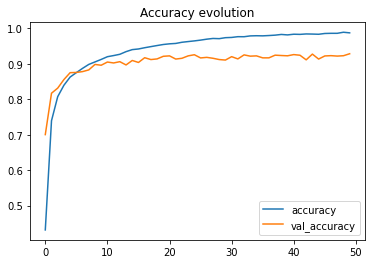

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

313/313 - 7s - loss: 0.3093 - accuracy: 0.9305
